<a href="https://colab.research.google.com/github/rohitdanda/deeplearningCodes/blob/master/SimpleLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [0]:
x = np.linspace(0,100,1000)
y = np.sin(x)

In [0]:
data = pd.DataFrame(data=y,index=x,columns=['Sine'])

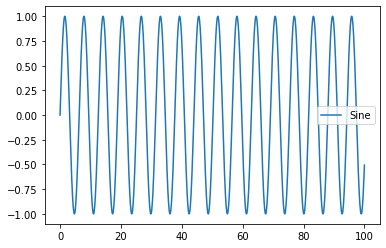

In [11]:
data.plot()

In [15]:
test_score = np.round(len(data)-100)
test_score

900

In [0]:
train = data.iloc[:test_score]
test = data.iloc[test_score:]

In [18]:
len(train)

900

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=50,batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=50,batch_size=1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential([
                    LSTM(50,input_shape=(50,1)),

                    Dense(1)
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mse')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='loss',patience=2)

In [43]:
model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
850/850 [==============================] - 13s 16ms/step - loss: 2.7687e-05 - val_loss: 1.3188e-06
Epoch 2/20
850/850 [==============================] - 13s 16ms/step - loss: 3.0734e-05 - val_loss: 3.2445e-05
Epoch 3/20
850/850 [==============================] - 14s 16ms/step - loss: 3.4567e-05 - val_loss: 5.0171e-06
Epoch 4/20
850/850 [==============================] - 13s 15ms/step - loss: 2.4614e-05 - val_loss: 4.3647e-07
Epoch 5/20
850/850 [==============================] - 13s 15ms/step - loss: 1.5639e-04 - val_loss: 0.0023
Epoch 6/20
850/850 [==============================] - 13s 15ms/step - loss: 2.2875e-05 - val_loss: 2.9739e-08
Epoch 7/20
850/850 [==============================] - 13s 16ms/step - loss: 1.5896e-07 - val_loss: 4.4394e-07
Epoch 8/20
850/850 [==============================] - 13s 15ms/step - loss: 2.5451e-05 - val_loss: 3.2697e-08
Epoch 9/20
850/850 [==============================] - 13s 15ms/step - loss: 2.7484e-06 - val_loss: 8.0208e-06
Epoch 10/20
85

In [0]:
test_prediction = []

current_batch = scaled_train[-50:].reshape((1,50,1))

In [0]:
for i in range(len(test)):
  predict_value = model.predict(current_batch)[0]
  test_prediction.append(predict_value)
  current_batch = np.append(current_batch[:,1:,:],[[predict_value]],axis=1)

In [0]:
true_prediction = scaler.inverse_transform(test_prediction)

In [47]:
test['prediction']=true_prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


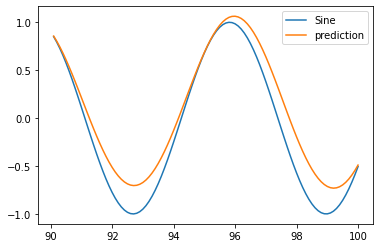

In [48]:
test.plot()